# Downloading and plotting soundfiles

Below represents my attempts to download and convert the sound files in the small sample into a spectrogram. I have not yet been able to do the conversion, but it should be a relatively straighforward procedure using a discrete fast Fourier transoform function built into scipy.

In [5]:
# Standard modules

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal       
from scipy.fft import fftshift  # discrete fast fourier?

The best method I've found for downloading data from Huggingface is to run <code>pip install datasets</code> or <code>python -m pip install datasets</code> in the terminal. This gives you a way to access their datasets that does not involve downloading a parquet file or anything else. (Some kind of API?)

In [5]:
# Loading the dataset

from datasets import load_dataset

songs = load_dataset("lewtun/music_genres_small", split='train')
songs

Found cached dataset parquet (C:/Users/blind/.cache/huggingface/datasets/lewtun___parquet/lewtun--music_genres_small-2686d03f87ff3ace/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


Dataset({
    features: ['audio', 'song_id', 'genre_id', 'genre'],
    num_rows: 1000
})

Below is an example of a song. As you can see, each item is a dictionary, and the sampling can be found in <code>['audio']['array']</code>.

In [6]:
songs[0]

{'audio': {'path': None,
  'array': array([ 0.        ,  0.        ,  0.        , ..., -0.00328412,
         -0.00250573, -0.00360047]),
  'sampling_rate': 44100},
 'song_id': 11483,
 'genre_id': 9,
 'genre': 'International'}

In [7]:
first_song_audio = songs[0]['audio']['array']
L = len(first_song_audio)

We conclude with a plot of the audio signal.

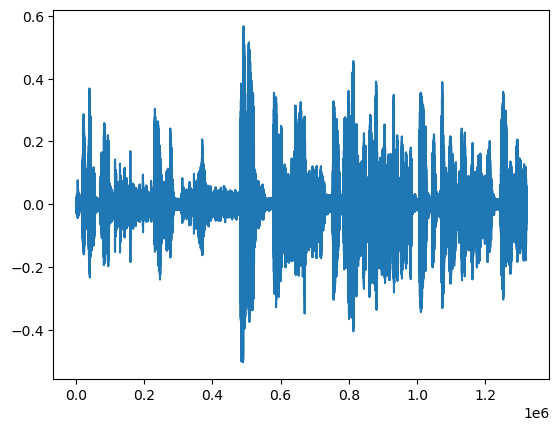

In [8]:
plt.plot(np.arange(L),first_song_audio)

Below is an example of a spectrogram from an unchanging signal. This was found 

In [11]:
rng = np.random.default_rng()
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time) # + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier #+ noise

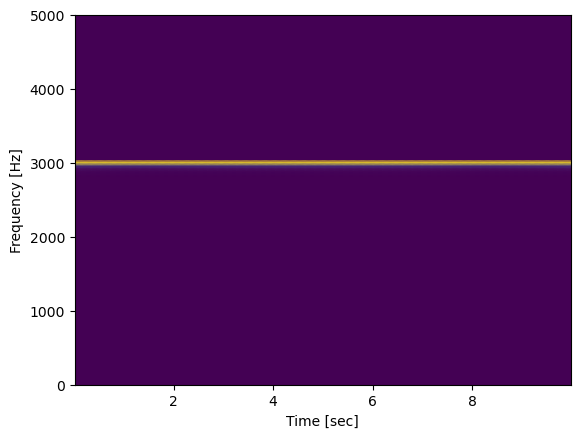

In [12]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()